In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
april = pd.read_csv("T_ONTIME_REPORTING_April2.csv")
may   = pd.read_csv("T_ONTIME_REPORTING_May2.csv")
june  = pd.read_csv("T_ONTIME_REPORTING_June2.csv")

combined = pd.concat([april, may, june], ignore_index=True)

combined = combined.sort_values(by=["MONTH"]).reset_index(drop=True)

combined.to_csv("T_ONTIME_REPORTING_AprilMayJune.csv", index=False)

print(combined.head())


   MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER ORIGIN ORIGIN_STATE_ABR  \
0      4             1            2                AA    CLT               NC   
1      4             1            2                AA    CLT               NC   
2      4             1            2                AA    CLT               NC   
3      4             1            2                AA    DFW               TX   
4      4             1            2                AA    DFW               TX   

  DEST DEST_STATE_ABR  CRS_DEP_TIME  DEP_DELAY  DEP_DELAY_NEW  DEP_DEL15  \
0  SEA             WA           940       -6.0            0.0        0.0   
1  SEA             WA          1623       -4.0            0.0        0.0   
2  SEA             WA          1805       -4.0            0.0        0.0   
3  GEG             WA          1930       11.0           11.0        0.0   
4  SEA             WA           705       -4.0            0.0        0.0   

   DEP_DELAY_GROUP  CRS_ARR_TIME  CANCELLED  CRS_ELAPSED

In [3]:
combined = pd.read_csv("T_ONTIME_REPORTING_AprilMayJune.csv")

wa_flights = combined[combined["ORIGIN_STATE_ABR"] == "WA"]

wa_flights.to_csv("T_ONTIME_REPORTING_WA.csv", index=False)

print(wa_flights.head())
print("Tổng số chuyến bay đến WA:", len(wa_flights))

    MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER ORIGIN  \
12      4             1            2                AA    GEG   
13      4             1            2                AA    GEG   
14      4             1            2                AA    GEG   
21      4             1            2                AA    SEA   
22      4             1            2                AA    SEA   

   ORIGIN_STATE_ABR DEST DEST_STATE_ABR  CRS_DEP_TIME  DEP_DELAY  \
12               WA  DFW             TX           534       -1.0   
13               WA  PHX             AZ           632       -5.0   
14               WA  PHX             AZ          1527       15.0   
21               WA  CLT             NC           720       -3.0   
22               WA  CLT             NC          1350       -3.0   

    DEP_DELAY_NEW  DEP_DEL15  DEP_DELAY_GROUP  CRS_ARR_TIME  CANCELLED  \
12            0.0        0.0             -1.0          1112        0.0   
13            0.0        0.0             -1.0       

In [4]:
df = pd.read_csv("T_ONTIME_REPORTING_WA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50372 entries, 0 to 50371
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              50372 non-null  int64  
 1   DAY_OF_MONTH       50372 non-null  int64  
 2   DAY_OF_WEEK        50372 non-null  int64  
 3   OP_UNIQUE_CARRIER  50372 non-null  object 
 4   ORIGIN             50372 non-null  object 
 5   ORIGIN_STATE_ABR   50372 non-null  object 
 6   DEST               50372 non-null  object 
 7   DEST_STATE_ABR     50372 non-null  object 
 8   CRS_DEP_TIME       50372 non-null  int64  
 9   DEP_DELAY          50196 non-null  float64
 10  DEP_DELAY_NEW      50196 non-null  float64
 11  DEP_DEL15          50196 non-null  float64
 12  DEP_DELAY_GROUP    50196 non-null  float64
 13  CRS_ARR_TIME       50372 non-null  int64  
 14  CANCELLED          50372 non-null  float64
 15  CRS_ELAPSED_TIME   50372 non-null  float64
 16  DISTANCE           503

In [5]:
df.isnull().sum()

MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
OP_UNIQUE_CARRIER      0
ORIGIN                 0
ORIGIN_STATE_ABR       0
DEST                   0
DEST_STATE_ABR         0
CRS_DEP_TIME           0
DEP_DELAY            176
DEP_DELAY_NEW        176
DEP_DEL15            176
DEP_DELAY_GROUP      176
CRS_ARR_TIME           0
CANCELLED              0
CRS_ELAPSED_TIME       0
DISTANCE               0
DISTANCE_GROUP         0
dtype: int64

In [6]:
df = df.dropna(subset=["DEP_DELAY", "DEP_DELAY_NEW", "DEP_DEL15", "DEP_DELAY_GROUP"]).reset_index(drop=True)
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
ORIGIN_STATE_ABR     0
DEST                 0
DEST_STATE_ABR       0
CRS_DEP_TIME         0
DEP_DELAY            0
DEP_DELAY_NEW        0
DEP_DEL15            0
DEP_DELAY_GROUP      0
CRS_ARR_TIME         0
CANCELLED            0
CRS_ELAPSED_TIME     0
DISTANCE             0
DISTANCE_GROUP       0
dtype: int64

In [7]:
num_cancelled = df[df["CANCELLED"] == 1].shape[0]
print("Number of cancelled flies (CANCELLED = 1):", num_cancelled)

df[df["CANCELLED"] == 1].head()

Number of cancelled flies (CANCELLED = 1): 10


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,CRS_ARR_TIME,CANCELLED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
524,4,2,3,AS,SEA,WA,BNA,TN,1742,426.0,426.0,1.0,12.0,2359,1.0,257.0,1978.0,8
11349,4,24,4,AS,SEA,WA,DEN,CO,1358,54.0,54.0,1.0,3.0,1738,1.0,160.0,1024.0,5
15631,5,2,5,AS,SEA,WA,PSC,WA,1950,-4.0,0.0,0.0,-1.0,2051,1.0,61.0,172.0,1
24646,5,19,1,AS,SEA,WA,JFK,NY,2140,-5.0,0.0,0.0,-1.0,609,1.0,329.0,2422.0,10
30349,5,29,4,AS,SEA,WA,KTN,AK,1151,4.0,4.0,0.0,0.0,1257,1.0,126.0,680.0,3


In [8]:
df = df[df["CANCELLED"] != 1]

print("Size of dataset:", df.shape)

Size of dataset: (50186, 18)


In [9]:
def hhmm_to_decimal(time_val):
    """
    Convert time from HHMM (e.g., 1130, 845) to decimal hour (e.g., 11.5, 8.75).
    """
    if pd.isna(time_val):
        return None
    
    time_val = int(time_val)
    hour = time_val // 100
    minute = time_val % 100
    decimal_time = hour + minute/60
    return round(decimal_time, 2)


df1 = df.copy()
df1["CRS_DEP_TIME"] = df1["CRS_DEP_TIME"].apply(hhmm_to_decimal)
df1["CRS_ARR_TIME"] = df1["CRS_ARR_TIME"].apply(hhmm_to_decimal)

df1.to_csv("clean_data_delay_Flights_with_Cancelled.csv", index=False)

In [10]:
df1 = pd.read_csv("clean_data_delay_Flights_with_Cancelled.csv")

df_final = df1.drop(columns=["CANCELLED"])

df_final.to_csv("clean_data_delay_Flights.csv", index=False)

In [11]:
flights = pd.read_csv("clean_data_delay_Flights.csv")
weather = pd.read_csv("wea_da_clean.csv")

flights["DEP_HOUR"] = np.floor(flights["CRS_DEP_TIME"]).astype(int)

flights["FL_DATE"] = pd.to_datetime(
    dict(year=2025, month=flights["MONTH"], day=flights["DAY_OF_MONTH"])
)

if weather["date"].str.len().min() <= 5:  # ví dụ '04-01'
    weather["date"] = "2025-" + weather["date"]  # thêm năm tạm
weather["date"] = pd.to_datetime(weather["date"], errors="coerce")

merged = flights.merge(
    weather,
    left_on=["ORIGIN", "FL_DATE", "DEP_HOUR"],
    right_on=["STATION", "date", "hour"],
    how="left"
)

print("Kích thước dữ liệu sau merge:", merged.shape)
print("Số lượng giá trị thiếu theo cột:")
print(merged.isna().sum())

Kích thước dữ liệu sau merge: (50186, 27)
Số lượng giá trị thiếu theo cột:
MONTH                         0
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
ORIGIN                        0
ORIGIN_STATE_ABR              0
DEST                          0
DEST_STATE_ABR                0
CRS_DEP_TIME                  0
DEP_DELAY                     0
DEP_DELAY_NEW                 0
DEP_DEL15                     0
DEP_DELAY_GROUP               0
CRS_ARR_TIME                  0
CRS_ELAPSED_TIME              0
DISTANCE                      0
DISTANCE_GROUP                0
DEP_HOUR                      0
FL_DATE                       0
STATION                      94
date                         94
hour                         94
HourlyDewPointTemperature    94
HourlyDryBulbTemperature     94
HourlyRelativeHumidity       94
HourlyVisibility             94
HourlyWindSpeed              94
dtype: int64


In [12]:
print("\nCác dòng đầu tiên sau merge:")
print(merged.head(10))


Các dòng đầu tiên sau merge:
   MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER ORIGIN ORIGIN_STATE_ABR  \
0      4             1            2                AA    GEG               WA   
1      4             1            2                AA    GEG               WA   
2      4             1            2                AA    GEG               WA   
3      4             1            2                AA    SEA               WA   
4      4             1            2                AA    SEA               WA   
5      4             1            2                AA    SEA               WA   
6      4             1            2                AA    SEA               WA   
7      4             1            2                AA    SEA               WA   
8      4             1            2                AA    SEA               WA   
9      4             1            2                AA    SEA               WA   

  DEST DEST_STATE_ABR  CRS_DEP_TIME  DEP_DELAY  ...  DEP_HOUR    FL_DATE  \
0 

In [13]:
merged.to_csv("final_data_test.csv", index=False)

In [14]:
cols_to_drop = ["DEP_HOUR", "FL_DATE", "STATION", "date", "hour"]
merged.drop(columns=cols_to_drop, inplace=True, errors="ignore")

print("Kích thước sau khi xóa:", merged.shape)
print("Các cột hiện còn:", list(merged.columns))


Kích thước sau khi xóa: (50186, 22)
Các cột hiện còn: ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_STATE_ABR', 'DEST', 'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlyVisibility', 'HourlyWindSpeed']


In [15]:
weather_cols = [
    "HourlyDewPointTemperature",
    "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity",
    "HourlyVisibility",
    "HourlyWindSpeed"
]

invalid_values = ["*", "", " ", "M", "T", "0.50s", "10.00s", "9999", "-9999"]

merged[weather_cols] = merged[weather_cols].replace(invalid_values, np.nan)

merged[weather_cols] = merged[weather_cols].apply(pd.to_numeric, errors="coerce")

before = merged.shape[0]
merged.dropna(subset=weather_cols, inplace=True)
after = merged.shape[0]

print(f" Đã xóa {before - after:,} dòng có dữ liệu thời tiết lỗi hoặc thiếu.")
print(f" Dữ liệu còn lại: {after:,} dòng.")


 Đã xóa 157 dòng có dữ liệu thời tiết lỗi hoặc thiếu.
 Dữ liệu còn lại: 50,029 dòng.


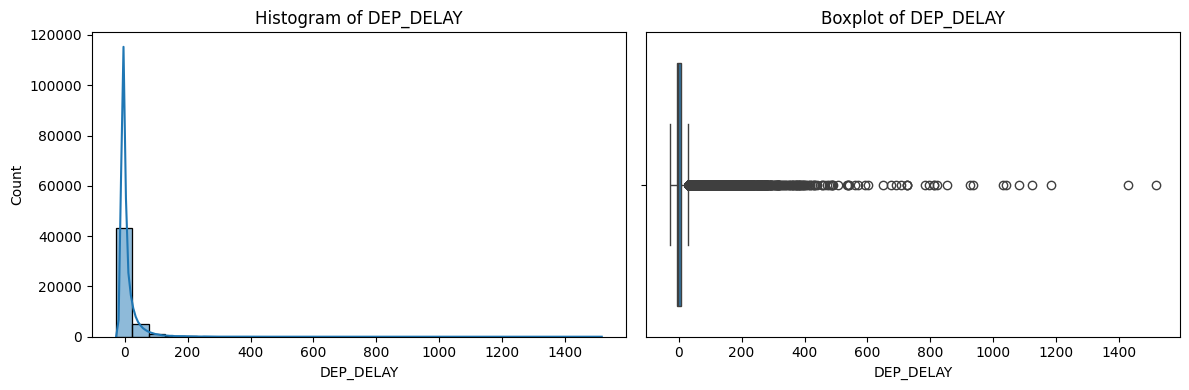

In [16]:
ta_col = ["DEP_DELAY"]

for col in ta_col:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.histplot(merged[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=merged[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

In [17]:
mean_delay = merged["DEP_DELAY"].mean()
print(f" Trung bình DEP_DELAY: {mean_delay:.2f} phút")

 Trung bình DEP_DELAY: 8.44 phút


In [18]:
merged = merged[merged["DEP_DELAY"] <= 35]

print(" Dataset sau khi lọc:", merged.shape)
print(merged["DEP_DELAY"].describe())


 Dataset sau khi lọc: (45155, 22)
count    45155.000000
mean         0.125833
std         10.457920
min        -27.000000
25%         -7.000000
50%         -3.000000
75%          4.000000
max         35.000000
Name: DEP_DELAY, dtype: float64


In [19]:
merged.to_csv("final_clean_data.csv", index=False)